In [1]:
import pandas as pd
import numpy as np

In [9]:
pr_gen_fuel_raw = pd.read_pickle('../data/raw_eia923__puerto_rico_generation_fuel')

# 1: Look at the data

In [10]:
pr_gen_fuel_raw

,associated_combined_heat_power,census_region,elec_fuel_consumption_mmbtu,electric_fuel_consumption_quantity,energy_source_code,fuel_consumed_for_electricity_mmbtu_april,fuel_consumed_for_electricity_mmbtu_august,fuel_consumed_for_electricity_mmbtu_december,fuel_consumed_for_electricity_mmbtu_february,fuel_consumed_for_electricity_mmbtu_january,...,plant_state,prime_mover_code,report_year,reporting_frequency_code,sector_id_eia,sector_name_eia,total_fuel_consumption_mmbtu,total_fuel_consumption_quantity,total_net_generation_mwh,data_maturity
0,N,NaN,1024754.0,0.0,WND,101260.0,131875.0,0.0,93604.0,94710.0,...,PR,WT,2017,NaN,2.0,NAICS-22 Non-Cogen,1024754.0,0.0,111229.0,final
1,Y,NaN,85845.0,82921.0,NG,0.0,11273.0,0.0,0.0,4773.0,...,PR,CA,2017,NaN,7.0,Industrial NAICS Cogen,85845.0,82921.0,752988.0,final
2,Y,NaN,22632800.0,21916433.0,NG,1976130.0,2363112.0,1943441.0,2044214.0,2195139.0,...,PR,CT,2017,NaN,7.0,Industrial NAICS Cogen,23660771.0,22909642.0,2020310.0,final
3,N,NaN,274243.0,0.0,SUN,31886.0,31453.0,0.0,30320.0,30873.0,...,PR,PV,2017,NaN,2.0,NAICS-22 Non-Cogen,274243.0,0.0,29767.0,final
4,N,NaN,24372958.0,1119122.0,BIT,3258736.0,2401564.0,0.0,1859176.0,2713537.0,...,PR,ST,2017,NaN,2.0,NAICS-22 Non-Cogen,24372958.0,1119122.0,2315554.0,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,NaN,323594.0,55792.0,DFO,.,.,.,143846.0,179748.0,...,PR,GT,2025.0,NaN,1.0,Electric Utility,323594.0,55792.0,25700.0,incremental_ytd
446,N,NaN,1987852.0,315532.0,RFO,.,.,.,968417.0,1019435.0,...,PR,ST,2025.0,NaN,1.0,Electric Utility,1987852.0,315532.0,192938.0,incremental_ytd
447,N,NaN,833507.0,143708.0,DFO,.,.,.,376049.0,457458.0,...,PR,GT,2025.0,NaN,1.0,Electric Utility,833507.0,143708.0,65800.0,incremental_ytd
448,N,NaN,662563.0,114235.0,DFO,.,.,.,201318.0,461245.0,...,PR,GT,2025.0,NaN,1.0,Electric Utility,662563.0,114235.0,60462.0,incremental_ytd


## What are all the categorical columns?

In [16]:
pr_gen_fuel_raw.associated_combined_heat_power.value_counts()

associated_combined_heat_power
N    298
Y    152
Name: count, dtype: int64

In [17]:
category_columns = ["associated_combined_heat_power"]

In [20]:
pr_gen_fuel_raw.dtypes

associated_combined_heat_power         object
census_region                          object
elec_fuel_consumption_mmbtu           float64
electric_fuel_consumption_quantity    float64
energy_source_code                     object
                                       ...   
sector_name_eia                        object
total_fuel_consumption_mmbtu          float64
total_fuel_consumption_quantity       float64
total_net_generation_mwh              float64
data_maturity                          object
Length: 96, dtype: object

In [21]:
pr_gen_fuel_raw.dtypes.value_counts()

object     87
float64     8
Int64       1
Name: count, dtype: int64

In [34]:
pr_gen_fuel_raw.dtypes[pr_gen_fuel_raw.dtypes=="object"]

associated_combined_heat_power                object
census_region                                 object
energy_source_code                            object
fuel_consumed_for_electricity_mmbtu_april     object
fuel_consumed_for_electricity_mmbtu_august    object
                                               ...  
prime_mover_code                              object
report_year                                   object
reporting_frequency_code                      object
sector_name_eia                               object
data_maturity                                 object
Length: 87, dtype: object

In [35]:
pr_gen_fuel_raw.dtypes[pr_gen_fuel_raw.dtypes=="object"].index

Index(['associated_combined_heat_power', 'census_region', 'energy_source_code',
       'fuel_consumed_for_electricity_mmbtu_april',
       'fuel_consumed_for_electricity_mmbtu_august',
       'fuel_consumed_for_electricity_mmbtu_december',
       'fuel_consumed_for_electricity_mmbtu_february',
       'fuel_consumed_for_electricity_mmbtu_january',
       'fuel_consumed_for_electricity_mmbtu_july',
       'fuel_consumed_for_electricity_mmbtu_june',
       'fuel_consumed_for_electricity_mmbtu_march',
       'fuel_consumed_for_electricity_mmbtu_may',
       'fuel_consumed_for_electricity_mmbtu_november',
       'fuel_consumed_for_electricity_mmbtu_october',
       'fuel_consumed_for_electricity_mmbtu_september',
       'fuel_consumed_for_electricity_units_april',
       'fuel_consumed_for_electricity_units_august',
       'fuel_consumed_for_electricity_units_december',
       'fuel_consumed_for_electricity_units_february',
       'fuel_consumed_for_electricity_units_january',
       'fuel_

## What are all the monthly columns?

Potential strategies:

* Eyeball variable prefixes and filter `.columns` using `.startswith`
* Use month suffixes and filter `.columns` using `.endswith`

In [36]:
all_columns = list(pr_gen_fuel_raw.columns)
fuel_consumed_for_electricity_columns = []
for col in all_columns:
    if col.startswith("fuel_consumed_for_electricity"):
        fuel_consumed_for_electricity_columns.append(col)
fuel_consumed_for_electricity_columns

['fuel_consumed_for_electricity_mmbtu_april',
 'fuel_consumed_for_electricity_mmbtu_august',
 'fuel_consumed_for_electricity_mmbtu_december',
 'fuel_consumed_for_electricity_mmbtu_february',
 'fuel_consumed_for_electricity_mmbtu_january',
 'fuel_consumed_for_electricity_mmbtu_july',
 'fuel_consumed_for_electricity_mmbtu_june',
 'fuel_consumed_for_electricity_mmbtu_march',
 'fuel_consumed_for_electricity_mmbtu_may',
 'fuel_consumed_for_electricity_mmbtu_november',
 'fuel_consumed_for_electricity_mmbtu_october',
 'fuel_consumed_for_electricity_mmbtu_september',
 'fuel_consumed_for_electricity_units_april',
 'fuel_consumed_for_electricity_units_august',
 'fuel_consumed_for_electricity_units_december',
 'fuel_consumed_for_electricity_units_february',
 'fuel_consumed_for_electricity_units_january',
 'fuel_consumed_for_electricity_units_july',
 'fuel_consumed_for_electricity_units_june',
 'fuel_consumed_for_electricity_units_march',
 'fuel_consumed_for_electricity_units_may',
 'fuel_consumed

In [37]:
january_columns = []
for col in all_columns:
    if col.endswith("january"):
        january_columns.append(col)
january_columns

['fuel_consumed_for_electricity_mmbtu_january',
 'fuel_consumed_for_electricity_units_january',
 'fuel_consumed_mmbtu_january',
 'fuel_consumed_units_january',
 'fuel_mmbtu_per_unit_january',
 'net_generation_mwh_january']

### Challenge: make a list `monthly_columns` with all the monthly columns in it

In [38]:
monthly_variables = []
for col in january_columns:
    monthly_variables.append(col.replace("_january", ""))
## alternatively:
# monthly_variables = [
#    "fuel_consumed_for_electricity_mmbtu", "fuel_consumed_for_electricity_units",
#    "fuel_consumed_mmbtu", "fuel_consumed_units",
#    "fuel_mmbtu_per_unit", "net_generation_mwh",
# ]

monthly_columns = []
for col in all_columns:
    for var in monthly_variables:
        if col.startswith(var):
            monthly_columns.append(col)
monthly_columns

['fuel_consumed_for_electricity_mmbtu_april',
 'fuel_consumed_for_electricity_mmbtu_august',
 'fuel_consumed_for_electricity_mmbtu_december',
 'fuel_consumed_for_electricity_mmbtu_february',
 'fuel_consumed_for_electricity_mmbtu_january',
 'fuel_consumed_for_electricity_mmbtu_july',
 'fuel_consumed_for_electricity_mmbtu_june',
 'fuel_consumed_for_electricity_mmbtu_march',
 'fuel_consumed_for_electricity_mmbtu_may',
 'fuel_consumed_for_electricity_mmbtu_november',
 'fuel_consumed_for_electricity_mmbtu_october',
 'fuel_consumed_for_electricity_mmbtu_september',
 'fuel_consumed_for_electricity_units_april',
 'fuel_consumed_for_electricity_units_august',
 'fuel_consumed_for_electricity_units_december',
 'fuel_consumed_for_electricity_units_february',
 'fuel_consumed_for_electricity_units_january',
 'fuel_consumed_for_electricity_units_july',
 'fuel_consumed_for_electricity_units_june',
 'fuel_consumed_for_electricity_units_march',
 'fuel_consumed_for_electricity_units_may',
 'fuel_consumed

## Okay _now_ what are all the categorical columns?

In [42]:
pr_gen_fuel_nomonths = pr_gen_fuel_raw.drop(columns=monthly_columns)
pr_gen_fuel_nomonths

,associated_combined_heat_power,census_region,elec_fuel_consumption_mmbtu,electric_fuel_consumption_quantity,energy_source_code,fuel_type_code_agg,fuel_unit,naics_code,nerc_region,nuclear_unit_id,...,plant_state,prime_mover_code,report_year,reporting_frequency_code,sector_id_eia,sector_name_eia,total_fuel_consumption_mmbtu,total_fuel_consumption_quantity,total_net_generation_mwh,data_maturity
0,N,NaN,1024754.0,0.0,WND,WND,NaN,22.0,NaN,.,...,PR,WT,2017,NaN,2.0,NAICS-22 Non-Cogen,1024754.0,0.0,111229.0,final
1,Y,NaN,85845.0,82921.0,NG,NG,mcf,2122.0,NaN,.,...,PR,CA,2017,NaN,7.0,Industrial NAICS Cogen,85845.0,82921.0,752988.0,final
2,Y,NaN,22632800.0,21916433.0,NG,NG,mcf,2122.0,NaN,.,...,PR,CT,2017,NaN,7.0,Industrial NAICS Cogen,23660771.0,22909642.0,2020310.0,final
3,N,NaN,274243.0,0.0,SUN,SUN,NaN,22.0,NaN,.,...,PR,PV,2017,NaN,2.0,NAICS-22 Non-Cogen,274243.0,0.0,29767.0,final
4,N,NaN,24372958.0,1119122.0,BIT,COL,short tons,22.0,NaN,.,...,PR,ST,2017,NaN,2.0,NAICS-22 Non-Cogen,24372958.0,1119122.0,2315554.0,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,NaN,323594.0,55792.0,DFO,DFO,barrels,22.0,NaN,.,...,PR,GT,2025.0,NaN,1.0,Electric Utility,323594.0,55792.0,25700.0,incremental_ytd
446,N,NaN,1987852.0,315532.0,RFO,RFO,barrels,22.0,NaN,.,...,PR,ST,2025.0,NaN,1.0,Electric Utility,1987852.0,315532.0,192938.0,incremental_ytd
447,N,NaN,833507.0,143708.0,DFO,DFO,barrels,22.0,NaN,.,...,PR,GT,2025.0,NaN,1.0,Electric Utility,833507.0,143708.0,65800.0,incremental_ytd
448,N,NaN,662563.0,114235.0,DFO,DFO,barrels,22.0,NaN,.,...,PR,GT,2025.0,NaN,1.0,Electric Utility,662563.0,114235.0,60462.0,incremental_ytd


In [45]:
pr_gen_fuel_nomonths.dtypes[pr_gen_fuel_nomonths.dtypes=="object"].index

Index(['associated_combined_heat_power', 'census_region', 'energy_source_code',
       'fuel_type_code_agg', 'fuel_unit', 'nerc_region', 'nuclear_unit_id',
       'operator_name', 'plant_name_eia', 'plant_state', 'prime_mover_code',
       'report_year', 'reporting_frequency_code', 'sector_name_eia',
       'data_maturity'],
      dtype='object')

In [44]:
category_columns = list(pr_gen_fuel_nomonths.dtypes[pr_gen_fuel_nomonths.dtypes=="object"].index)
category_columns

['associated_combined_heat_power',
 'census_region',
 'energy_source_code',
 'fuel_type_code_agg',
 'fuel_unit',
 'nerc_region',
 'nuclear_unit_id',
 'operator_name',
 'plant_name_eia',
 'plant_state',
 'prime_mover_code',
 'report_year',
 'reporting_frequency_code',
 'sector_name_eia',
 'data_maturity']

In [49]:
pr_gen_fuel_raw[category_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   associated_combined_heat_power  450 non-null    object
 1   census_region                   0 non-null      object
 2   energy_source_code              450 non-null    object
 3   fuel_type_code_agg              450 non-null    object
 4   fuel_unit                       319 non-null    object
 5   nerc_region                     0 non-null      object
 6   nuclear_unit_id                 450 non-null    object
 7   operator_name                   450 non-null    object
 8   plant_name_eia                  450 non-null    object
 9   plant_state                     450 non-null    object
 10  prime_mover_code                450 non-null    object
 11  report_year                     450 non-null    object
 12  reporting_frequency_code        349 non-null    ob

## What is the NA situation?

In [60]:
pr_gen_fuel_raw[category_columns]

,associated_combined_heat_power,census_region,energy_source_code,fuel_type_code_agg,fuel_unit,nerc_region,nuclear_unit_id,operator_name,plant_name_eia,plant_state,prime_mover_code,report_year,reporting_frequency_code,sector_name_eia,data_maturity
0,N,NaN,WND,WND,NaN,NaN,.,Pattern Operators LP,Pattern Santa Isabel LLC,PR,WT,2017,NaN,NAICS-22 Non-Cogen,final
1,Y,NaN,NG,NG,mcf,NaN,.,EcoElectrica LP,EcoElectrica,PR,CA,2017,NaN,Industrial NAICS Cogen,final
2,Y,NaN,NG,NG,mcf,NaN,.,EcoElectrica LP,EcoElectrica,PR,CT,2017,NaN,Industrial NAICS Cogen,final
3,N,NaN,SUN,SUN,NaN,NaN,.,"AES ILUMINA, LLC",AES ILUMINA,PR,PV,2017,NaN,NAICS-22 Non-Cogen,final
4,N,NaN,BIT,COL,short tons,NaN,.,AES Puerto Rico LP,AES Puerto Rico,PR,ST,2017,NaN,NAICS-22 Non-Cogen,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,NaN,DFO,DFO,barrels,NaN,.,Puerto Rico Electric Pwr Authority,Palo Seco Plant,PR,GT,2025.0,NaN,Electric Utility,incremental_ytd
446,N,NaN,RFO,RFO,barrels,NaN,.,Puerto Rico Electric Pwr Authority,Palo Seco Plant,PR,ST,2025.0,NaN,Electric Utility,incremental_ytd
447,N,NaN,DFO,DFO,barrels,NaN,.,Puerto Rico Electric Pwr Authority,Cambalache Plant,PR,GT,2025.0,NaN,Electric Utility,incremental_ytd
448,N,NaN,DFO,DFO,barrels,NaN,.,Puerto Rico Electric Pwr Authority,Mayaguez Plant,PR,GT,2025.0,NaN,Electric Utility,incremental_ytd


In [65]:
df = pr_gen_fuel_raw[category_columns].drop(columns=["census_region", "nerc_region"])
df.loc[df.isna().any(axis="columns")]

,associated_combined_heat_power,energy_source_code,fuel_type_code_agg,fuel_unit,nuclear_unit_id,operator_name,plant_name_eia,plant_state,prime_mover_code,report_year,reporting_frequency_code,sector_name_eia,data_maturity
0,N,WND,WND,NaN,.,Pattern Operators LP,Pattern Santa Isabel LLC,PR,WT,2017,NaN,NAICS-22 Non-Cogen,final
1,Y,NG,NG,mcf,.,EcoElectrica LP,EcoElectrica,PR,CA,2017,NaN,Industrial NAICS Cogen,final
2,Y,NG,NG,mcf,.,EcoElectrica LP,EcoElectrica,PR,CT,2017,NaN,Industrial NAICS Cogen,final
3,N,SUN,SUN,NaN,.,"AES ILUMINA, LLC",AES ILUMINA,PR,PV,2017,NaN,NAICS-22 Non-Cogen,final
4,N,BIT,COL,short tons,.,AES Puerto Rico LP,AES Puerto Rico,PR,ST,2017,NaN,NAICS-22 Non-Cogen,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,DFO,DFO,barrels,.,Puerto Rico Electric Pwr Authority,Palo Seco Plant,PR,GT,2025.0,NaN,Electric Utility,incremental_ytd
446,N,RFO,RFO,barrels,.,Puerto Rico Electric Pwr Authority,Palo Seco Plant,PR,ST,2025.0,NaN,Electric Utility,incremental_ytd
447,N,DFO,DFO,barrels,.,Puerto Rico Electric Pwr Authority,Cambalache Plant,PR,GT,2025.0,NaN,Electric Utility,incremental_ytd
448,N,DFO,DFO,barrels,.,Puerto Rico Electric Pwr Authority,Mayaguez Plant,PR,GT,2025.0,NaN,Electric Utility,incremental_ytd


In [67]:
df[df.fuel_unit.isna()].energy_source_code.value_counts()

energy_source_code
SUN    99
WND    17
WAT    15
Name: count, dtype: int64

## What are all the non-monthly numerical columns?

In [51]:
pr_gen_fuel_nomonths.dtypes[pr_gen_fuel_nomonths.dtypes=="float64"]

elec_fuel_consumption_mmbtu           float64
electric_fuel_consumption_quantity    float64
naics_code                            float64
operator_id                           float64
sector_id_eia                         float64
total_fuel_consumption_mmbtu          float64
total_fuel_consumption_quantity       float64
total_net_generation_mwh              float64
dtype: object

In [54]:
numerical_columns = list(pr_gen_fuel_nomonths.dtypes[pr_gen_fuel_nomonths.dtypes=="float64"].index)

## `.describe()` and friends

In [55]:
pr_gen_fuel_raw[numerical_columns].describe()

,elec_fuel_consumption_mmbtu,electric_fuel_consumption_quantity,naics_code,operator_id,sector_id_eia,total_fuel_consumption_mmbtu,total_fuel_consumption_quantity,total_net_generation_mwh
count,4.500000e+02,4.500000e+02,450.000000,450.000000,450.000000,4.500000e+02,4.500000e+02,4.500000e+02
mean,3.167467e+06,1.326281e+06,194.431111,40219.960000,2.135556,3.202204e+06,1.336276e+06,3.038875e+05
std,7.659211e+06,4.947355e+06,501.512901,22774.100409,1.782575,7.702912e+06,4.973162e+06,6.835693e+05
min,0.000000e+00,0.000000e+00,22.000000,15497.000000,1.000000,0.000000e+00,0.000000e+00,-2.884000e+03
25%,1.265000e+02,0.000000e+00,22.000000,15497.000000,1.000000,2.047500e+02,0.000000e+00,6.125000e+01
50%,4.693500e+04,1.980000e+02,22.000000,60671.000000,1.000000,4.803250e+04,2.160000e+02,1.004300e+04
75%,9.905178e+05,1.950398e+05,22.000000,60725.000000,2.000000,9.905178e+05,1.950398e+05,1.359350e+05
max,4.619306e+07,4.399339e+07,2122.000000,65407.000000,7.000000,4.662165e+07,4.440158e+07,3.841868e+06


# 2: Look at how far your predecessor got

In [8]:
pr_gen_fuel_elec_final = pd.read_parquet("../data/pr_gen_fuel_elec_final.parquet")
pr_gen_fuel_elec_final

,plant_id_eia,plant_name_eia,prime_mover_code,energy_source_code,fuel_consumed_for_electricity_mmbtu,date
0,61014,Pattern Santa Isabel LLC,WT,WND,101260.0,2017-04-01
1,61034,EcoElectrica,CA,NG,0.0,2017-04-01
2,61034,EcoElectrica,CT,NG,1976130.0,2017-04-01
3,61036,AES ILUMINA,PV,SUN,31886.0,2017-04-01
4,61082,AES Puerto Rico,ST,BIT,3258736.0,2017-04-01
...,...,...,...,...,...,...
5395,61149,Palo Seco Plant,GT,DFO,<NA>,2025-09-01
5396,61149,Palo Seco Plant,ST,RFO,<NA>,2025-09-01
5397,61150,Cambalache Plant,GT,DFO,<NA>,2025-09-01
5398,61151,Mayaguez Plant,GT,DFO,<NA>,2025-09-01


In [6]:
pr_gen_fuel_elec_final.groupby("energy_source_code").fuel_consumed_for_electricity_mmbtu.describe()

,count,mean,std,min,25%,50%,75%,max
energy_source_code,,,,,,,,
BIT,98.0,2581392.010204,810869.174458,0.0,2164422.75,2827872.5,3144607.5,3631866.0
DFO,2067.0,103230.225448,282297.459883,0.0,0.0,584.0,34572.5,2079926.0
MWH,257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NG,513.0,969863.278752,1152557.96189,0.0,1285.0,102244.0,2035556.0,4701353.0
RFO,542.0,814229.062731,973552.825705,0.0,87.25,535229.0,1419885.5,4141444.0
SUN,1130.0,10605.035398,15721.212625,0.0,1058.5,3522.5,15853.0,81357.0
WAT,169.0,1262.964497,3030.959301,0.0,0.0,0.0,1348.0,19274.0
WND,172.0,46265.912791,52939.266874,0.0,0.0,28736.0,68695.0,200034.0


<Axes: xlabel='date'>

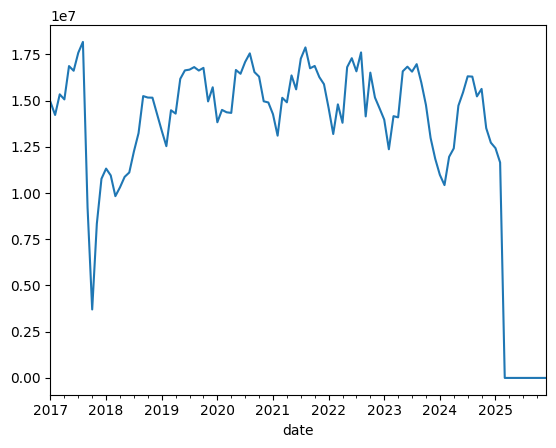

In [68]:
pr_gen_fuel_elec_final.groupby("date").fuel_consumed_for_electricity_mmbtu.sum().plot()

<Axes: xlabel='date'>

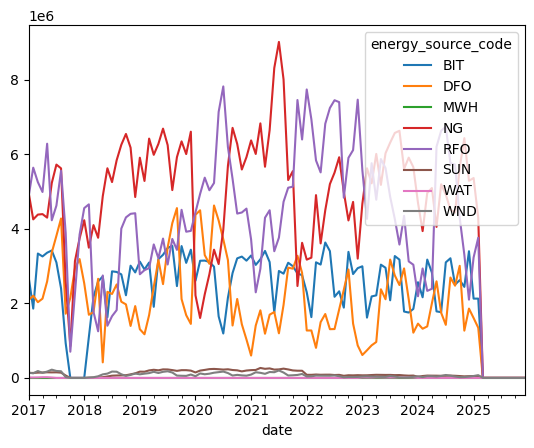

In [73]:
(
    pr_gen_fuel_elec_final.groupby(["energy_source_code","date"])
    .fuel_consumed_for_electricity_mmbtu.sum()
    .unstack("energy_source_code").plot()
)

In [ ]:
# oh look it's hurricane maria :(

In [ ]:
# what happened to renewables in 2022??
# let's look at netgen

# 3: Extend their work to cover the other things you found